### **Electrical Fault Detection**

**Importing libraries and loading data**

In [127]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras 
from keras import models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [128]:
#loading dataset
detection = pd.read_csv('detect_dataset.csv')
df_class = pd.read_csv('classData.csv')

**Fault Detection - Binary Classification**

Data Preprocessing

In [129]:
detection.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [130]:
#removing NaN columns
detection.drop(detection.iloc[:,[7,8]], axis=1, inplace=True)

In [131]:
detection.shape

(12001, 7)

Data Visualization

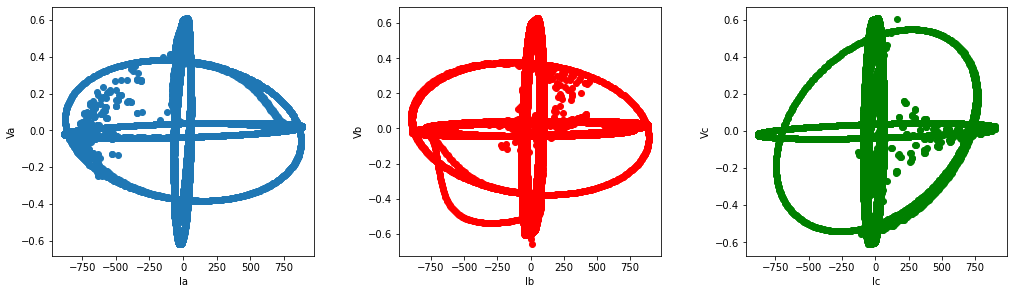

In [132]:
#Plotting Voltage vs Current Graph
plt.subplots(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(detection['Ia'], detection['Va'])
plt.xlabel("Ia")
plt.ylabel("Va")

plt.subplot(1, 3, 2)
plt.scatter(detection['Ib'], detection['Vb'], color = "red")
plt.xlabel("Ib")
plt.ylabel("Vb")

plt.subplot(1, 3, 3)
plt.scatter(detection['Ic'], detection['Vc'], color = "green")
plt.xlabel("Ic")
plt.ylabel("Vc")

plt.tight_layout(4)
plt.show()

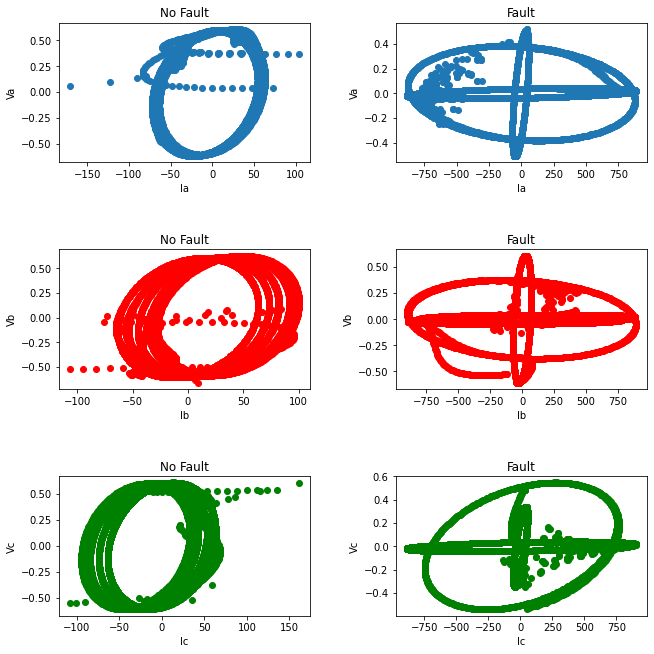

In [133]:
#Plotting graph for fault and no fault
fault = detection[detection['Output (S)'] == 1]
no_fault = detection[detection['Output (S)'] == 0]

plt.subplots(figsize=(10, 10))

plt.subplot(3, 2, 1)
plt.scatter(no_fault['Ia'], no_fault['Va'])
plt.xlabel("Ia")
plt.ylabel("Va")
plt.title("No Fault")

plt.subplot(3, 2, 2)
plt.scatter(fault['Ia'], fault['Va'])
plt.xlabel("Ia")
plt.ylabel("Va")
plt.title("Fault")

plt.subplot(3, 2, 3)
plt.scatter(no_fault['Ib'], no_fault['Vb'], color = "red")
plt.xlabel("Ib")
plt.ylabel("Vb")
plt.title("No Fault")

plt.subplot(3, 2, 4)
plt.scatter(fault['Ib'], fault['Vb'], color = "red")
plt.xlabel("Ib")
plt.ylabel("Vb")
plt.title("Fault")

plt.subplot(3, 2, 5)
plt.scatter(no_fault['Ic'], no_fault['Vc'], color = "green")
plt.xlabel("Ic")
plt.ylabel("Vc")
plt.title("No Fault")

plt.subplot(3, 2, 6)
plt.scatter(fault['Ic'], fault['Vc'], color = "green")
plt.xlabel("Ic")
plt.ylabel("Vc")
plt.title("Fault")

plt.tight_layout(4)
plt.show()

In [134]:
#Checking for null values
detection.isna().sum()

Output (S)    0
Ia            0
Ib            0
Ic            0
Va            0
Vb            0
Vc            0
dtype: int64

Model Creation

In [135]:
#setting feature and target variable
y = detection.iloc[:,0]
X = detection.iloc[:,1:7]

#splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [136]:
#Model Creation
detection_model = models.Sequential()

detection_model.add(keras.layers.Dense(6,
                              input_shape=(6,),
                              name='Input_layer',
                              activation='relu'))
detection_model.add(keras.layers.Dense(16,
                             name='Hidden_layer1',
                             activation='relu'))
detection_model.add(keras.layers.Dense(1,
                             name='Output_layer',
                             activation='sigmoid'))

detection_model.compile(optimizer = keras.optimizers.Adam(), 
                        loss = keras.losses.binary_crossentropy, 
                        metrics = keras.metrics.binary_accuracy)

In [137]:
detection_model.fit(X_train, y_train, epochs=15)

Epoch 1/15
300/300 [==============================] - 1s 2ms/step - loss: 2.8003 - binary_accuracy: 0.5469
Epoch 2/15
300/300 [==============================] - 1s 2ms/step - loss: 0.3422 - binary_accuracy: 0.8656
Epoch 3/15
300/300 [==============================] - 0s 2ms/step - loss: 0.2109 - binary_accuracy: 0.9734
Epoch 4/15
300/300 [==============================] - 0s 2ms/step - loss: 0.1549 - binary_accuracy: 0.9776
Epoch 5/15
300/300 [==============================] - 1s 2ms/step - loss: 0.1222 - binary_accuracy: 0.9797
Epoch 6/15
300/300 [==============================] - 1s 2ms/step - loss: 0.1039 - binary_accuracy: 0.9801
Epoch 7/15
300/300 [==============================] - 0s 2ms/step - loss: 0.0901 - binary_accuracy: 0.9817
Epoch 8/15
300/300 [==============================] - 0s 2ms/step - loss: 0.0806 - binary_accuracy: 0.9827
Epoch 9/15
300/300 [==============================] - 1s 2ms/step - loss: 0.0720 - binary_accuracy: 0.9832
Epoch 10/15
300/300 [================

In [138]:
y_pred = detection_model.predict(X_test)
y_pred = np.where(y_pred>0.5, 1, 0)

76/76 [==============================] - 0s 1ms/step


Model Performance

In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1297
           1       1.00      0.98      0.99      1104

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401



In [140]:
print(f'Accuracy Score : {accuracy_score(y_test, y_pred)*100:.02f}%')

Accuracy Score : 99.04%


Text(0.5, 257.44, 'Predicted label')

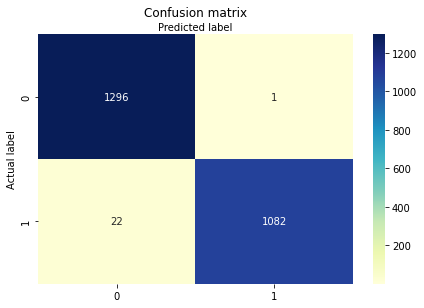

In [141]:
#confusion matrix
fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Fault Classification - Multiclass Classification**

Data Preprocessing

In [142]:
df_class.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [143]:
df_class.shape

(7861, 10)

Output: [G C B A]

[0 0 0 0] - No Fault

[1 0 0 1] - LG fault (Between Phase A and Ground)

[0 0 1 1] - LL fault (Between Phase A and Phase B)

[1 0 1 1] - LLG Fault (Between Phases A,B and Ground)

[0 1 1 1] - LLL Fault (Between all three phases)

[1 1 1 1] - LLLG fault (Three phase symmetrical fault)

In [144]:
#creating a new column for fault type
df_class['faultType'] = (df_class['G'].astype(str) + 
                         df_class['C'].astype(str) + 
                         df_class['B'].astype(str) + 
                         df_class['A'].astype(str))
df_class.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,faultType
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [145]:
df_class["faultType"].unique()

array(['1001', '1011', '0110', '0111', '1111', '0000'], dtype=object)

Data Visualization

<BarContainer object of 6 artists>

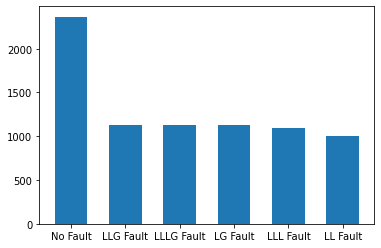

In [146]:
values = list(df_class["faultType"].value_counts())
faults =['No Fault', 'LLG Fault', 'LLLG Fault', 'LG Fault', 'LLL Fault', 'LL Fault']
plt.bar(faults, values, width=0.6)


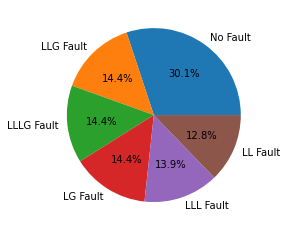

In [147]:
plt.pie(df_class['faultType'].value_counts(), autopct='%1.1f%%', labels=faults)
plt.show()

Model Creation

In [148]:
#setting features
x = df_class.iloc[:,4:10]
#setting target vriable
y = df_class['faultType']

In [149]:
enc = LabelEncoder()
y = enc.fit_transform(y)

In [150]:
y = keras.utils.to_categorical(y,6)

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [152]:
#model creation
class_model = keras.models.Sequential()

class_model.add(keras.layers.Dense(128,
                              input_shape=(6,),
                              name='Input_layer',
                              activation='relu'))
class_model.add(keras.layers.Dense(240,
                              name='Hidden_layer1',
                              activation='relu'))
class_model.add(keras.layers.Dense(240,
                              name='Hidden_layer2',
                              activation='tanh'))

class_model.add(keras.layers.Dense(6,
                             name='output_layer',
                             activation='softmax'))

class_model.compile(
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

In [153]:
class_model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
79/79 [==============================] - 1s 7ms/step - loss: 1.1536 - accuracy: 0.5835 - val_loss: 1.0546 - val_accuracy: 0.6574
Epoch 2/50
79/79 [==============================] - 0s 5ms/step - loss: 0.9865 - accuracy: 0.6249 - val_loss: 0.9910 - val_accuracy: 0.6320
Epoch 3/50
79/79 [==============================] - 0s 5ms/step - loss: 0.9166 - accuracy: 0.6583 - val_loss: 0.9363 - val_accuracy: 0.6002
Epoch 4/50
79/79 [==============================] - 0s 5ms/step - loss: 0.8445 - accuracy: 0.6722 - val_loss: 0.7850 - val_accuracy: 0.6781
Epoch 5/50
79/79 [==============================] - 0s 5ms/step - loss: 0.7754 - accuracy: 0.6879 - val_loss: 0.7942 - val_accuracy: 0.6781
Epoch 6/50
79/79 [==============================] - 0s 5ms/step - loss: 0.7195 - accuracy: 0.7060 - val_loss: 0.7350 - val_accuracy: 0.7114
Epoch 7/50
79/79 [==============================] - 0s 6ms/step - loss: 0.6777 - accuracy: 0.7213 - val_loss: 0.9044 - val_accuracy: 0.5946
Epoch 8/50
79/79 [==

In [154]:
y_pred_prob = class_model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test = np.argmax(y_test,axis=1)

50/50 [==============================] - 0s 2ms/step


Model Performance

In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       0.83      0.90      0.86       195
           2       0.74      0.08      0.14       225
           3       0.94      0.99      0.97       215
           4       0.96      0.92      0.94       238
           5       0.46      0.83      0.59       224

    accuracy                           0.82      1573
   macro avg       0.82      0.79      0.75      1573
weighted avg       0.85      0.82      0.79      1573



In [156]:
print(f'Accuracy Score : {accuracy_score(y_test, y_pred)*100:.02f}%')

Accuracy Score : 81.75%
